In [5]:
import math
import numpy as np
import copy

import torch
import torch.nn as nn


x = torch.rand(3,4,5,6)
print(x[0,0,:,:])
x_rfft = torch.fft.rfftn(x, dim=[2, 3])
print(x_rfft.shape)  #3, 4, 5, 4
print(x_rfft[0,0,:,:])
# Multiply relevant Fourier modes
x_fft = torch.fft.fftn(x, dim=[2, 3])
print(x_fft.shape)  #3, 4, 5, 6
print(x_fft[0,0,:,:])   
# Return to physical space
x = torch.fft.irfftn(x_fft, s=(x.size(-2), x.size(-1)), dim=[2, 3])
print(x.shape)
print(x[0,0,:,:])

tensor([[0.1047, 0.9377, 0.1485, 0.4493, 0.9500, 0.1171],
        [0.4101, 0.1290, 0.0520, 0.2682, 0.5249, 0.1635],
        [0.9313, 0.6172, 0.0664, 0.0707, 0.1284, 0.1407],
        [0.5988, 0.4176, 0.1377, 0.4261, 0.4805, 0.2615],
        [0.8363, 0.4130, 0.9913, 0.4973, 0.9340, 0.9350]])
torch.Size([3, 4, 5, 4])
tensor([[13.1390+0.0000j,  1.0289+0.6281j,  0.3196-2.1814j,  1.4511+0.0000j],
        [ 1.1492+3.1255j, -1.7102-0.1006j, -2.1293-1.2479j, -0.2169+0.3568j],
        [-0.9503+1.4487j,  0.5257+0.1643j, -0.6813-1.9603j, -1.2605+0.4646j],
        [-0.9503-1.4487j, -0.5081-1.6815j,  0.2897-1.6016j, -1.2605-0.4646j],
        [ 1.1492-3.1255j, -1.1684+0.9071j, -0.4122-0.0323j, -0.2169-0.3568j]])
torch.Size([3, 4, 5, 6])
tensor([[13.1390+0.0000j,  1.0289+0.6281j,  0.3196-2.1814j,  1.4511+0.0000j,
          0.3196+2.1814j,  1.0289-0.6281j],
        [ 1.1492+3.1255j, -1.7102-0.1006j, -2.1293-1.2479j, -0.2169+0.3568j,
         -0.4122+0.0323j, -1.1684-0.9071j],
        [-0.9503+1.4487j, 

In [17]:
def compute_2dFourier_modes(k):
    trunc_k = np.int64(np.sqrt(k)) + 1

    k_pairs = np.zeros(((2 * trunc_k + 1) ** 2, 2))
    k_pair_mag = np.zeros((2 * trunc_k + 1) ** 2)

    i = 0
    for kx in range(-trunc_k, trunc_k + 1):
        for ky in range(-trunc_k, trunc_k + 1):

            k_pairs[i, :] = kx, ky
            k_pair_mag[i] = kx**2 + ky**2
            i += 1

    k_pairs = k_pairs[np.argsort(k_pair_mag), :]
    return k_pairs[0:k, :]
def compute_2dFourier_cbases(nx, ny, k, Lx, Ly):
    gridx, gridy = np.meshgrid(
        np.linspace(0, Lx, nx + 1)[:-1], np.linspace(0, Ly, ny + 1)[:-1]
    )
    cbases = np.zeros((nx, ny, k), dtype=np.complex128)  

    weights = np.ones((nx, ny)) * Lx * Ly / (nx * ny)

    k_pairs = compute_2dFourier_modes(k)
    for i in range(k):
        kx, ky = k_pairs[i, :]
        if kx == 0 and ky == 0:
            cbases[:, :, i] = np.sqrt(1 / (Lx * Ly))
        else:
            exp_term = 2 * np.pi * (kx * gridx / Lx + ky * gridy / Ly)
            complex_exp = np.exp(1j * exp_term)
            cbases[:, :, i] = np.sqrt(1 / (Lx * Ly)) * complex_exp


    return gridx, gridy, cbases, weights

def compute_2dFourier_cbases_inv(nx, ny, k, Lx, Ly):
    gridx, gridy = np.meshgrid(
        np.linspace(0, Lx, nx + 1)[:-1], np.linspace(0, Ly, ny + 1)[:-1]
    )
    cbases_inv = np.zeros((nx, ny, k), dtype=np.complex128)  

    weights = np.ones((nx, ny)) * Lx * Ly / (nx * ny)

    k_pairs = compute_2dFourier_modes(k)
    for i in range(k):
        kx, ky = k_pairs[i, :]
        if kx == 0 and ky == 0:
            cbases_inv[:, :, i] = np.sqrt(1 / (Lx * Ly))
        else:
            exp_term = 2 * np.pi * (kx * gridx / Lx + ky * gridy / Ly)
            complex_exp = np.exp(-1j * exp_term)
            cbases_inv[:, :, i] = np.sqrt(1 / (Lx * Ly)) * complex_exp


    return gridx, gridy, cbases_inv, weights

tensor([ 1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         1.0000+0.0000e+00j,  1.0000+0.0000e+00j,  1.0000+0.0000e+00j,
         0.9781-2.0791e-01j,  0.9781-2.0791e-01j,  0.9781-2.0791e-01j,
         0.9781-2.0791e-01j,  0.9781-2.0791e-01j,  0.9781-2.0791e-01j,
         0.9781-2.0791e-01j,  0.9781-2.0791e-01j,  0.9781-2.0791e-01j,
         0.9781-2.0791e-01j,  0.9781-2.0791e-01j,  0.9781-2.0791e-01j,
      

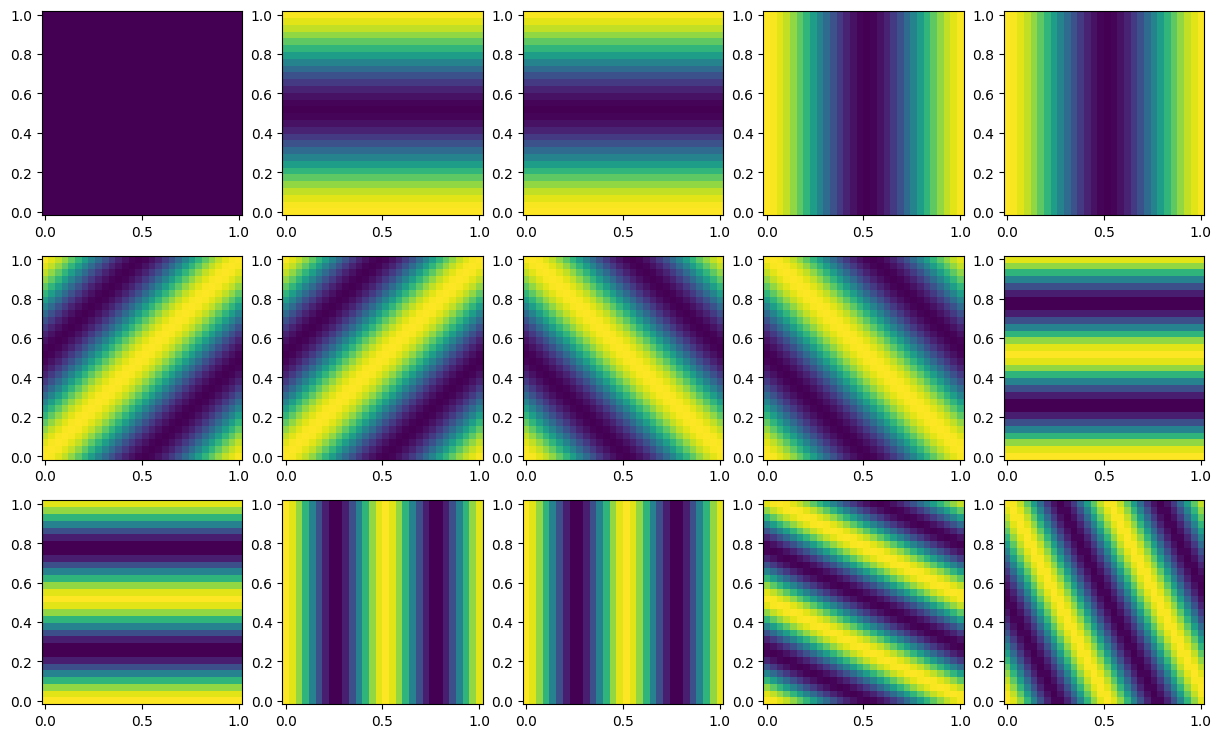

In [24]:
def compute_H(bases, wkernel_bases, wkernel_bases_inv):
    bases = bases.to(dtype=torch.complex64)
    bases_hat = torch.einsum("xl,xj->lj", bases , wkernel_bases)
    bases_hat_inv = torch.einsum("xk,xj->kj", bases , wkernel_bases_inv)
    print(bases_hat[0,0],bases_hat[1,1],bases_hat_inv[0,0],bases_hat_inv[1,1])
    B1 = bases_hat_inv.transpose(0,1).unsqueeze(2)    # shape : kernel_mode, mode, 1
    B2 = bases_hat.transpose(0,1).unsqueeze(1)    #shape: kernel_mode, 1, mode
    H = torch.matmul(B1, B2)   #shape: kernel_mode, mode, mode
    #H[j, k, l] = bases_hat[l, j] * bases_hat_inv[k, j]
    return H

Np = 30
k_max_kernel = 24
modes=16
L=1
gridx, gridy, cfbases, weights = compute_2dFourier_cbases(Np, Np, k_max_kernel, L, L)
cfbases = cfbases.reshape(-1, k_max_kernel)
weights = weights.reshape(-1)
cwfbases = cfbases * np.tile(weights, (k_max_kernel, 1)).T
cbases_fourier = torch.from_numpy(cfbases.astype(np.complex64))
print(cbases_fourier[:,1])
cwbases_fourier = torch.from_numpy(cwfbases.astype(np.complex64))

gridx, gridy, cfbases_inv, weights = compute_2dFourier_cbases_inv(Np, Np, k_max_kernel, L, L)
cfbases_inv = cfbases_inv.reshape(-1, k_max_kernel)
weights = weights.reshape(-1)
cwfbases_inv = cfbases_inv * np.tile(weights, (k_max_kernel, 1)).T
cbases_fourier_inv = torch.from_numpy(cfbases_inv.astype(np.complex64))
cwbases_fourier_inv = torch.from_numpy(cwfbases_inv.astype(np.complex64))

bases = cbases_fourier[:,:16]
H = compute_H(bases, cwbases_fourier , cwbases_fourier_inv)
print(H[0,0,0],H[1,1,2],H[2,2,1])

import matplotlib.pyplot as plt
print(cfbases.shape)
# bases_pca_2d = bases_pca.reshape(Np,Np,k_max).to('cpu')
# wbases_pca_2d = wbases_pca.reshape(Np,Np,k_max).to('cpu')
# bases_fourier_2d = bases_fourier.reshape(Np,Np,k_max).to('cpu')
# wbases_fourier_2d = wbases_fourier.reshape(Np,Np,k_max).to('cpu')
mygrid = np.linspace(0, L, Np)
grid_x, grid_y = np.meshgrid(mygrid, mygrid)
m=3
n=5
cfbases = cfbases.reshape(Np,Np,-1)
fbases = cfbases.real
fig, axs = plt.subplots(m, n, figsize=(3*n,3*m))
for i in range(5):
    axs[0,i].pcolormesh(grid_x, grid_y, fbases[:,:,i])
    axs[1,i].pcolormesh(grid_x, grid_y, fbases[:,:,i+5])
    axs[2,i].pcolormesh(grid_x, grid_y, fbases[:,:,i+10])
    # axs[2,i].pcolormesh(grid_x, grid_y, wbases_pca_2d[:,:,i])
    # axs[3,i].pcolormesh(grid_x, grid_y, bases_fourier_2d[:,:,i])
    # axs[4,i].pcolormesh(grid_x, grid_y, bases_fourier_2d[:,:,i+5])

In [1]:
def mycompl_mul1d(weights, H , x_hat):
    x_hat1 = torch.einsum('jkl,bil -> bijk', H , x_hat)
    y = torch.einsum('ioj,bijk -> bok', weights , x_hat1)
    return y

i,o,j,k,l,b = 64,128,32,512,512,8
weights = torch.rand(i,o,j)
H = torch.rand(j,k,l)
x_hat  = torch.rand(b,i,l)
y = mycompl_mul1d(weights, H , x_hat)

print(y.shape,b,o,k)

NameError: name 'torch' is not defined